In [1]:
%load_ext autoreload
%autoreload 2

import torch
import numpy as np
import pickle

GB1_MAX_FITNESS = 8.76196565571
PHOQ_MAX_FITNESS = 133.59427

In [46]:
df = torch.load("./../../data/GB1/esm-1b_dataframe.pt")
df = df.sort_values("Fitness", ascending=True)
embedding = torch.stack(tuple(df["Embedding"].values))
fitness = df["Fitness"].values

In [8]:
si = df.loc[df["Variants"] == "VDGV"].index
fi = df.loc[df["Variants"] == "IWGF"].index

In [33]:
dataset = "PhoQ" # GB1, PhoQ
f = torch.load("./../../data/"+dataset+"/esm-1b_fitness.pt") #df["Fitness"].values
v = torch.load("./../../data/"+dataset+"/esm-1b_variants.pt") #df["Variants"].values
d = dict(map(lambda i,j : (i,j), v, f))

embedding = torch.load("./../../data/"+dataset+"/esm-1b_embedding_complete.pt")
variants = torch.load("./../../data/"+dataset+"/esm-1b_variants_complete.pt")
fitness = [d.get(v, torch.tensor(0., dtype=torch.float64)) for v in variants]

data = [(embedding[i], variants[i], fitness[i]) for i in range(len(embedding))]
data.sort(key = lambda x: x[2])
embedding = [d[0] for d in data]
variants = [d[1] for d in data]
fitness = [d[2] for d in data]

In [32]:
embedding_gb1 = embedding
fitness_gb1 = fitness

In [34]:
embedding_phoq = embedding
fitness_phoq = fitness

In [35]:
embedding = embedding_gb1 + embedding_phoq
fitness = fitness_gb1 + fitness_phoq

In [157]:
import pickle
with open("s:\\Documents\\master\\code\\de\\data\\neighborhood_de\\history_esm1b_NDYP.pkl", 'rb') as f:
    history, history_top = pickle.load(f)
#indexes = [df.loc[df["Variants"] == residues].index for residues in history]
#indexes_top = [df.loc[df["Variants"] == residues].index for residues in history_top]
indexes = [variants.index(v) for v in history]
indexes_top = [variants.index(v) for v in history_top]
si = variants.index("VDGV")
fi = variants.index("FWAA")

In [155]:
variants[indexes[3]]

'RRFL'

In [139]:
[i == indexes_top[300] for i in indexes_top].index(True)

247

In [13]:
indexes = [10318, 33616, 43109, 43115, 16096, 84894, 97696, 38226, 40717, 114736]

PCA 2D

In [36]:
from sklearn.decomposition import PCA

pca = PCA(n_components=20)

pc = pca.fit_transform(embedding)

In [37]:
f = open("./PhoQ_pca.pkl", "wb")
pickle.dump(pc, f)

f = open("./PhoQ_variants.pkl", "wb")
pickle.dump(variants, f)

In [30]:
f = open("./phoq_pca.pkl", "rb")
pc = pickle.load(f)

In [33]:
pca.explained_variance_

array([0.0087069 , 0.0058717 , 0.00428751, 0.00324217, 0.00165091,
       0.0014578 , 0.00127463, 0.00106149, 0.00097216, 0.00081083,
       0.00071834, 0.00058574, 0.00055534, 0.00052304, 0.00040086,
       0.0003836 , 0.00034342, 0.0003106 , 0.00030286, 0.00026668])

In [38]:
pca.explained_variance_ratio_

array([9.73741302e-01, 5.09272930e-03, 4.54702986e-03, 1.95968027e-03,
       1.50066293e-03, 1.06895513e-03, 9.18883688e-04, 8.91246097e-04,
       7.81462882e-04, 6.74890880e-04, 6.13409284e-04, 5.52482732e-04,
       5.16558577e-04, 5.00535068e-04, 4.22171793e-04, 3.87406945e-04,
       3.70930821e-04, 3.04336056e-04, 2.92497856e-04, 2.66544786e-04])

In [24]:
f = open("./../plot/boes_phoq_pca.pkl", "rb")
x1, x2, y = pickle.load(f)

C:\Users\Matouš\AppData\Local\Temp\ipykernel_13976\3247251075.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cbar.ax.set_yticklabels(["0", "10", "20", "30", "40", "50", "≥60"])


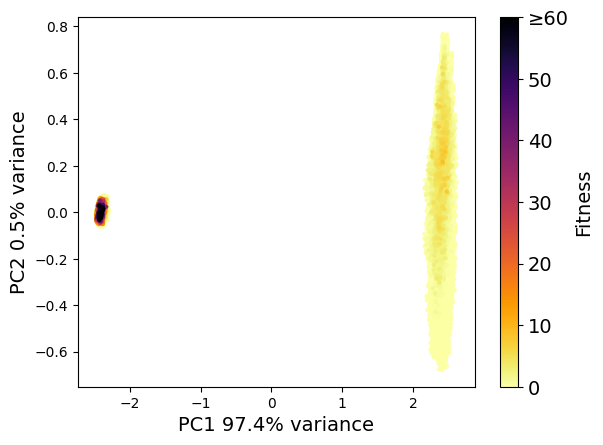

In [39]:
import matplotlib.pyplot as plt

default_fontsize = 14

plt.scatter(
    #x1,
    #x2,
    pc[:,0],
    pc[:,1],
    marker=".",
    # s=150,
    linewidths=0.1,
    #c=y*PHOQ_MAX_FITNESS,
    c=fitness,
    cmap=plt.cm.inferno_r,
    vmin=0.,
    vmax=60.,
    #vmax=133.59427,
)
plt.xlabel("PC1 97.4% variance", fontsize=default_fontsize)
plt.ylabel("PC2 0.5% variance", fontsize=default_fontsize)
cbar = plt.colorbar()
cbar.ax.set_yticklabels(["0", "10", "20", "30", "40", "50", "≥60"])
#cbar.ax.set_yticklabels(["≤0", "1", "2", "3", "4", "5", "6", "7", "8"])
cbar.ax.tick_params(labelsize=default_fontsize)
cbar.set_label(label="Fitness", fontsize=default_fontsize)

C:\Users\Matouš\AppData\Local\Temp\ipykernel_13976\2554112979.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cbar.ax.set_yticklabels(["0", "1", "2", "3", "4", "5", "6", "7", "8"])
C:\Users\Matouš\AppData\Local\Temp\ipykernel_13976\2554112979.py:40: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cbar.ax.set_yticklabels(["0", "10", "20", "30", "40", "50", "≥60"])


Text(0, 0.5, 'PC2 0.5% variance')

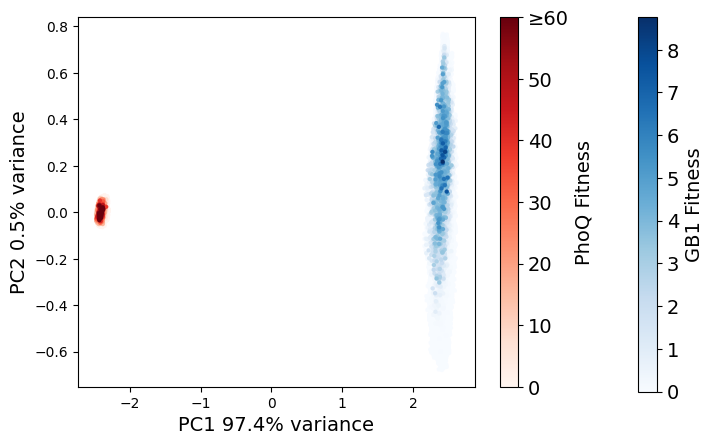

In [81]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

fig, ax = plt.subplots()

s1 = ax.scatter(
    pc[0:160000, 0],
    pc[0:160000, 1],
    marker=".",
    # s=150,
    linewidths=0.1,
    c=fitness[0:160000],
    #c=[1]*160000,
    cmap=plt.cm.Blues,
    label="GB1",
)
cax = fig.add_axes([1., 0.1, 0.03, 0.78])
cbar = fig.colorbar(s1, cax=cax)
cbar.ax.set_yticklabels(["0", "1", "2", "3", "4", "5", "6", "7", "8"])
cbar.ax.tick_params(labelsize=default_fontsize)
cbar.set_label(label="GB1 Fitness", fontsize=default_fontsize)

s2 = ax.scatter(
    pc[160000:320000, 0],
    pc[160000:320000, 1],
    marker=".",
    # s=150,
    linewidths=0.1,
    c=fitness[160000:320000],
    #c=[1]*160000,
    vmin=0.,
    vmax=60.,
    cmap=plt.cm.Reds,
    label="PhoQ",
)
#divider = make_axes_locatable(ax)
#cax = divider.new_horizontal(size="5%", pad=0.7, pack_start=False)
#fig.add_axes(cax)
cbar = fig.colorbar(s2)
cbar.ax.set_yticklabels(["0", "10", "20", "30", "40", "50", "≥60"])
cbar.ax.tick_params(labelsize=default_fontsize)
cbar.set_label(label="PhoQ Fitness", fontsize=default_fontsize)

ax.set_xlabel("PC1 97.4% variance", fontsize=default_fontsize)
ax.set_ylabel("PC2 0.5% variance", fontsize=default_fontsize)

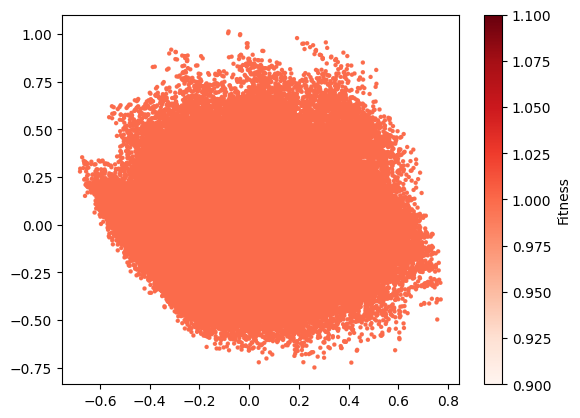

In [96]:
import matplotlib.pyplot as plt

#fig = plt.figure(figsize=(16,10))
#ax = fig.add_subplot()
""" plt.scatter(
    pc[160000:320000, 0],
    pc[160000:320000, 1],
    marker=".",
    # s=150,
    linewidths=0.1,
    #c=fitness[160000:320000],
    c=[1]*160000,
    cmap=plt.cm.Reds,
)
plt.colorbar(label="Fitness") """

plt.scatter(
    pc[0:160000, 0],
    pc[0:160000, 1],
    marker=".",
    # s=150,
    linewidths=0.1,
    #c=fitness[0:160000],
    c=[1]*160000,
    cmap=plt.cm.Reds,
)
plt.colorbar(label="Fitness")

PCA 3D

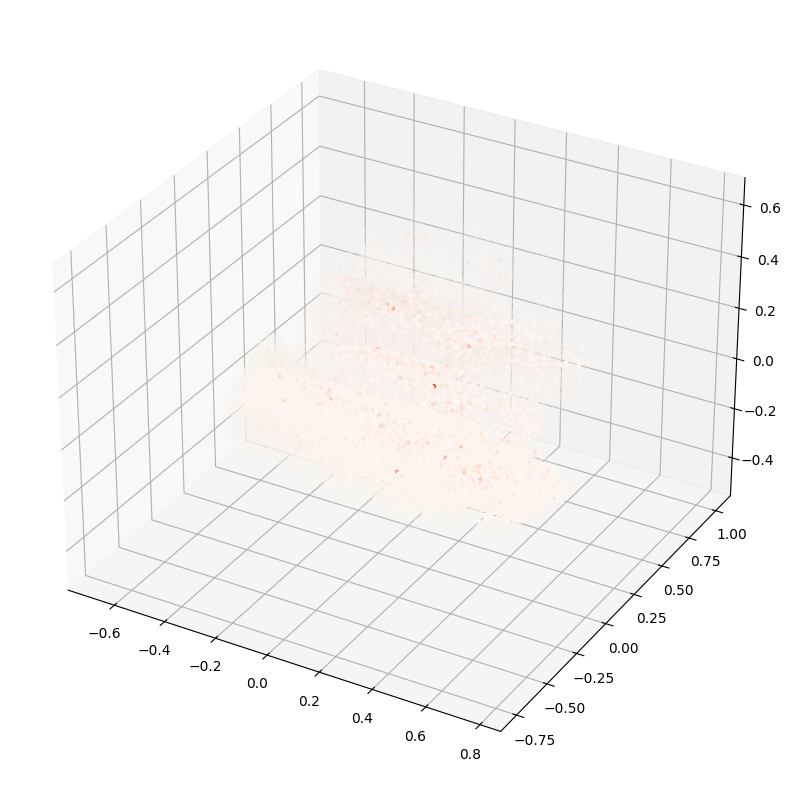

In [56]:
import matplotlib.pyplot as plt

ax = plt.figure(figsize=(16,10)).add_subplot(projection='3d')
ax.scatter(
    xs=pc[:, 0],
    ys=pc[:, 1],
    zs=pc[:, 2],
    marker=".",
    #s=150,
    #linewidths=4,
    c=fitness,
    alpha=np.minimum(np.array(fitness)+0.1, 1),
    cmap=plt.cm.Reds
)

t-SNE

In [7]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2)

tsnec = tsne.fit_transform(np.array(embedding))

In [8]:
f = open("./joint_tsne.pkl", "wb")
pickle.dump(tsnec, f)

In [22]:
f = open("./phoq_tsne.pkl", "rb")
tsnec = pickle.load(f)

In [15]:
f = open("./../plot/boes_phoq_tsne.pkl", "rb")
x1, x2, y = pickle.load(f)

C:\Users\Matouš\AppData\Local\Temp\ipykernel_13976\991183914.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cbar.ax.set_yticklabels(["0", "10", "20", "30", "40", "50", "≥60"]) #≤≥


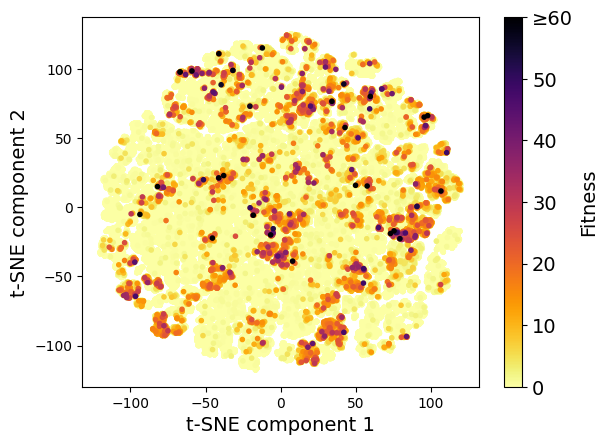

In [23]:
import matplotlib.pyplot as plt

default_fontsize = 14

plt.scatter(
    #x1,
    #x2,
    tsnec[:, 0],
    tsnec[:, 1],
    marker=".",
    #s=150,
    #linewidths=4,
    c=fitness,
    #c=y*PHOQ_MAX_FITNESS,
    vmin=0.,
    vmax=60.,
    #c=fitness,
    #c=[1]*160000,
    cmap=plt.cm.inferno_r
)
plt.xlabel("t-SNE component 1", fontsize=default_fontsize)
plt.ylabel("t-SNE component 2", fontsize=default_fontsize)
cbar = plt.colorbar()
cbar.ax.set_yticklabels(["0", "10", "20", "30", "40", "50", "≥60"]) #≤≥
#cbar.ax.set_yticklabels(["≤0", "1", "2", "3", "4", "5", "6", "7", "8"])
cbar.ax.tick_params(labelsize=default_fontsize)
cbar.set_label(label="Fitness", fontsize=default_fontsize)

In [ ]:
plt.scatter(
    tsnec[0:160000, 0],
    tsnec[0:160000, 1],
    marker=".",
    #s=150,
    #linewidths=4,
    #c=fitness,
    c=fitness[0:160000],
    #c=[1]*160000,
    cmap=plt.cm.Blues
)
plt.colorbar(label="Fitness")

plt.scatter(
    tsnec[160000:320000, 0],
    tsnec[160000:320000, 1],
    marker=".",
    #s=150,
    #linewidths=4,
    #c=fitness,
    #c=fitness[160000:320000],
    c=[1]*160000,
    cmap=plt.cm.Reds
)
plt.colorbar(label="Fitness")